In [1]:
def get_obj_values(run_gen_text_content: str):
    output_list = []
    for solution_text in run_gen_text_content.split("--------------")[:-1]:
        run_gen_solution_text_content = solution_text
        output_list.append([float(item[item.find(': ')+2:]) for item in run_gen_solution_text_content[run_gen_solution_text_content.find(']')+1:].split('\n')[1:-1]])
    return output_list

In [2]:
import os

def load_runs_and_gens_as_dict(directory="."):
    data = {}
    run_index = 0

    while True:
        run_key = f"run_{run_index}"
        gen_index = 0
        run_data = []

        while True:
            filename = f"{run_key}_gen_{gen_index}.txt"
            filepath = os.path.join(directory, filename)

            if os.path.isfile(filepath):
                with open(filepath, 'r', encoding='utf-8') as f:
                    run_data.append(get_obj_values(f.read()))
                gen_index += 1
            else:
                break  # No more gens for this run

        if run_data:
            data[run_key] = run_data
            run_index += 1
        else:
            break  # No more runs

    return data


In [3]:
run_gen_dict = load_runs_and_gens_as_dict()
run_gen_dict

{'run_0': [[[0.48, 0.59, 0.44],
   [0.53, 0.56, 0.43],
   [0.51, 0.57, 0.44],
   [0.52, 0.58, 0.39],
   [0.48, 0.55, 0.46],
   [0.46, 0.54, 0.64],
   [0.53, 0.53, 0.46],
   [0.44, 0.57, 0.53],
   [0.48, 0.54, 0.59],
   [0.56, 0.47, 0.41],
   [0.56, 0.54, 0.36],
   [0.49, 0.49, 0.51],
   [0.5, 0.58, 0.41],
   [0.52, 0.55, 0.44],
   [0.55, 0.57, 0.4]],
  [[0.48, 0.59, 0.44],
   [0.51, 0.57, 0.44],
   [0.52, 0.58, 0.39],
   [0.44, 0.57, 0.53],
   [0.56, 0.47, 0.41],
   [0.56, 0.54, 0.36],
   [0.49, 0.49, 0.51],
   [0.5, 0.58, 0.41],
   [0.52, 0.55, 0.44],
   [0.49, 0.59, 0.41],
   [0.53, 0.55, 0.4],
   [0.42, 0.56, 0.57],
   [0.62, 0.55, 0.33],
   [0.58, 0.49, 0.4],
   [0.4, 0.54, 0.59],
   [0.54, 0.52, 0.42],
   [0.45, 0.54, 0.5],
   [0.48, 0.51, 0.45]],
  [[0.56, 0.47, 0.41],
   [0.56, 0.54, 0.36],
   [0.62, 0.55, 0.33],
   [0.58, 0.49, 0.4],
   [0.54, 0.52, 0.42],
   [0.48, 0.51, 0.45],
   [0.47, 0.52, 0.47],
   [0.52, 0.54, 0.38],
   [0.63, 0.51, 0.38],
   [0.6, 0.56, 0.35],
   [0.49,

In [4]:
def dict_to_data_for_visualization(run_gen_values_dict: dict):
    all = {}
    for key,run in run_gen_values_dict.items():
        all[key] = {}
        for generation in run:
            all[key][run.index(generation)] = {}
            min_obj1 = min([solution[0] for solution in generation])
            min_obj2 = min([solution[1] for solution in generation])
            min_obj3 = min([solution[2] for solution in generation])
            avg_obj1 = sum([solution[0] for solution in generation]) / len(generation)
            avg_obj2 = sum([solution[1] for solution in generation]) / len(generation)
            avg_obj3 = sum([solution[2] for solution in generation]) / len(generation)

            all[key][run.index(generation)]["min_obj1"] = min_obj1
            all[key][run.index(generation)]["min_obj2"] = min_obj2
            all[key][run.index(generation)]["min_obj3"] = min_obj3

            all[key][run.index(generation)]["avg_obj1"] = avg_obj1
            all[key][run.index(generation)]["avg_obj2"] = avg_obj2
            all[key][run.index(generation)]["avg_obj3"] = avg_obj3

            print(f"For the run index {key} and generation index {run.index(generation)}:")
            print(f"MIN of objective index 0: {min_obj1}")
            print(f"MIN of objective index 1: {min_obj2}")
            print(f"MIN of objective index 2: {min_obj3}")
            print(f"AVG of objective index 0: {avg_obj1}")
            print(f"AVG of objective index 1: {avg_obj2}")
            print(f"AVG of objective index 2: {avg_obj3}")
            print("--------------")
    return all


visualization_data = dict_to_data_for_visualization(run_gen_dict)
visualization_data

For the run index run_0 and generation index 0:
MIN of objective index 0: 0.44
MIN of objective index 1: 0.47
MIN of objective index 2: 0.36
AVG of objective index 0: 0.5073333333333333
AVG of objective index 1: 0.5486666666666667
AVG of objective index 2: 0.46066666666666667
--------------
For the run index run_0 and generation index 1:
MIN of objective index 0: 0.4
MIN of objective index 1: 0.47
MIN of objective index 2: 0.33
AVG of objective index 0: 0.505
AVG of objective index 1: 0.5438888888888889
AVG of objective index 2: 0.4444444444444444
--------------
For the run index run_0 and generation index 2:
MIN of objective index 0: 0.4
MIN of objective index 1: 0.47
MIN of objective index 2: 0.33
AVG of objective index 0: 0.5414285714285715
AVG of objective index 1: 0.5235714285714286
AVG of objective index 2: 0.39571428571428574
--------------
For the run index run_0 and generation index 3:
MIN of objective index 0: 0.34
MIN of objective index 1: 0.47
MIN of objective index 2: 0.33

{'run_0': {0: {'min_obj1': 0.44,
   'min_obj2': 0.47,
   'min_obj3': 0.36,
   'avg_obj1': 0.5073333333333333,
   'avg_obj2': 0.5486666666666667,
   'avg_obj3': 0.46066666666666667},
  1: {'min_obj1': 0.4,
   'min_obj2': 0.47,
   'min_obj3': 0.33,
   'avg_obj1': 0.505,
   'avg_obj2': 0.5438888888888889,
   'avg_obj3': 0.4444444444444444},
  2: {'min_obj1': 0.4,
   'min_obj2': 0.47,
   'min_obj3': 0.33,
   'avg_obj1': 0.5414285714285715,
   'avg_obj2': 0.5235714285714286,
   'avg_obj3': 0.39571428571428574},
  3: {'min_obj1': 0.34,
   'min_obj2': 0.47,
   'min_obj3': 0.33,
   'avg_obj1': 0.5188888888888888,
   'avg_obj2': 0.515,
   'avg_obj3': 0.4222222222222222},
  4: {'min_obj1': 0.34,
   'min_obj2': 0.47,
   'min_obj3': 0.33,
   'avg_obj1': 0.47214285714285714,
   'avg_obj2': 0.5028571428571429,
   'avg_obj3': 0.43142857142857144},
  5: {'min_obj1': 0.33,
   'min_obj2': 0.47,
   'min_obj3': 0.31,
   'avg_obj1': 0.4375,
   'avg_obj2': 0.5066666666666667,
   'avg_obj3': 0.39333333333333

{0: {'min_obj1': 0.44, 'min_obj2': 0.47, 'min_obj3': 0.36, 'avg_obj1': 0.5073333333333333, 'avg_obj2': 0.5486666666666667, 'avg_obj3': 0.46066666666666667}, 1: {'min_obj1': 0.4, 'min_obj2': 0.47, 'min_obj3': 0.33, 'avg_obj1': 0.505, 'avg_obj2': 0.5438888888888889, 'avg_obj3': 0.4444444444444444}, 2: {'min_obj1': 0.4, 'min_obj2': 0.47, 'min_obj3': 0.33, 'avg_obj1': 0.5414285714285715, 'avg_obj2': 0.5235714285714286, 'avg_obj3': 0.39571428571428574}, 3: {'min_obj1': 0.34, 'min_obj2': 0.47, 'min_obj3': 0.33, 'avg_obj1': 0.5188888888888888, 'avg_obj2': 0.515, 'avg_obj3': 0.4222222222222222}, 4: {'min_obj1': 0.34, 'min_obj2': 0.47, 'min_obj3': 0.33, 'avg_obj1': 0.47214285714285714, 'avg_obj2': 0.5028571428571429, 'avg_obj3': 0.43142857142857144}, 5: {'min_obj1': 0.33, 'min_obj2': 0.47, 'min_obj3': 0.31, 'avg_obj1': 0.4375, 'avg_obj2': 0.5066666666666667, 'avg_obj3': 0.3933333333333333}, 6: {'min_obj1': 0.33, 'min_obj2': 0.44, 'min_obj3': 0.31, 'avg_obj1': 0.45045454545454544, 'avg_obj2': 0.

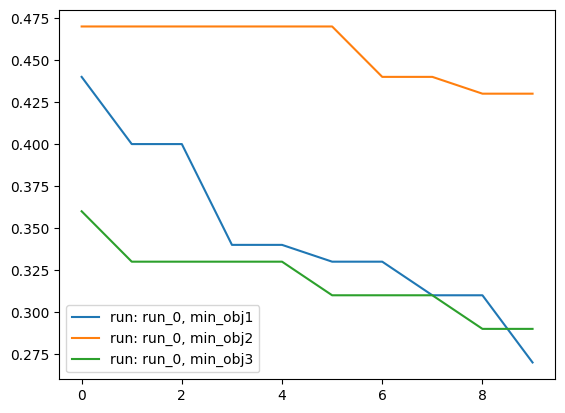

{0: {'min_obj1': 0.45, 'min_obj2': 0.67, 'min_obj3': 0.2, 'avg_obj1': 0.5266666666666667, 'avg_obj2': 0.7016666666666667, 'avg_obj3': 0.26666666666666666}, 1: {'min_obj1': 0.45, 'min_obj2': 0.67, 'min_obj3': 0.2, 'avg_obj1': 0.5155555555555555, 'avg_obj2': 0.701111111111111, 'avg_obj3': 0.25}, 2: {'min_obj1': 0.45, 'min_obj2': 0.67, 'min_obj3': 0.18, 'avg_obj1': 0.4945454545454545, 'avg_obj2': 0.7054545454545454, 'avg_obj3': 0.30363636363636365}, 3: {'min_obj1': 0.42, 'min_obj2': 0.65, 'min_obj3': 0.18, 'avg_obj1': 0.5, 'avg_obj2': 0.6799999999999999, 'avg_obj3': 0.255}, 4: {'min_obj1': 0.37, 'min_obj2': 0.65, 'min_obj3': 0.18, 'avg_obj1': 0.4876923076923077, 'avg_obj2': 0.6823076923076923, 'avg_obj3': 0.26153846153846155}, 5: {'min_obj1': 0.37, 'min_obj2': 0.65, 'min_obj3': 0.18, 'avg_obj1': 0.48142857142857143, 'avg_obj2': 0.6807142857142857, 'avg_obj3': 0.23214285714285715}, 6: {'min_obj1': 0.33, 'min_obj2': 0.65, 'min_obj3': 0.18, 'avg_obj1': 0.47333333333333333, 'avg_obj2': 0.6814

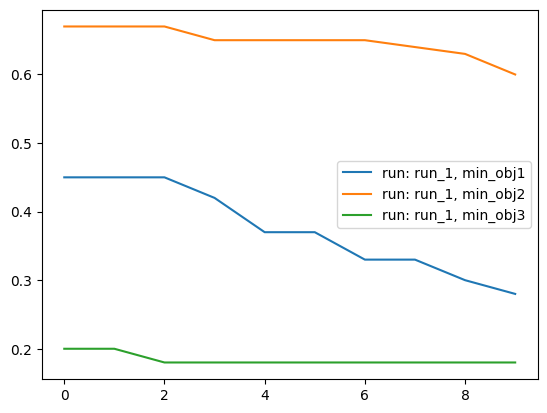

{0: {'min_obj1': 0.5, 'min_obj2': 0.79, 'min_obj3': 0.15, 'avg_obj1': 0.5437500000000001, 'avg_obj2': 0.80875, 'avg_obj3': 0.165}, 1: {'min_obj1': 0.47, 'min_obj2': 0.78, 'min_obj3': 0.14, 'avg_obj1': 0.5416666666666666, 'avg_obj2': 0.7999999999999999, 'avg_obj3': 0.18000000000000002}, 2: {'min_obj1': 0.47, 'min_obj2': 0.78, 'min_obj3': 0.14, 'avg_obj1': 0.5366666666666667, 'avg_obj2': 0.795, 'avg_obj3': 0.18000000000000002}, 3: {'min_obj1': 0.47, 'min_obj2': 0.78, 'min_obj3': 0.14, 'avg_obj1': 0.5233333333333333, 'avg_obj2': 0.7933333333333333, 'avg_obj3': 0.17833333333333334}, 4: {'min_obj1': 0.41, 'min_obj2': 0.77, 'min_obj3': 0.14, 'avg_obj1': 0.5175, 'avg_obj2': 0.7875000000000001, 'avg_obj3': 0.17}, 5: {'min_obj1': 0.41, 'min_obj2': 0.76, 'min_obj3': 0.13, 'avg_obj1': 0.4990909090909091, 'avg_obj2': 0.7890909090909091, 'avg_obj3': 0.17}, 6: {'min_obj1': 0.41, 'min_obj2': 0.76, 'min_obj3': 0.13, 'avg_obj1': 0.5028571428571429, 'avg_obj2': 0.7892857142857144, 'avg_obj3': 0.16642857

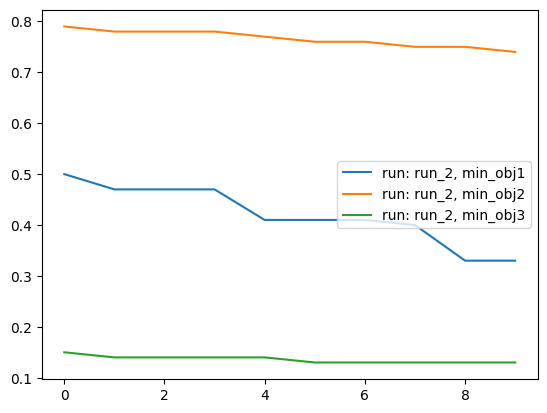

{0: {'min_obj1': 0.54, 'min_obj2': 0.82, 'min_obj3': 0.11, 'avg_obj1': 0.5733333333333334, 'avg_obj2': 0.84, 'avg_obj3': 0.13333333333333333}, 1: {'min_obj1': 0.5, 'min_obj2': 0.81, 'min_obj3': 0.11, 'avg_obj1': 0.5792307692307692, 'avg_obj2': 0.8415384615384615, 'avg_obj3': 0.13615384615384615}, 2: {'min_obj1': 0.49, 'min_obj2': 0.81, 'min_obj3': 0.11, 'avg_obj1': 0.5757142857142857, 'avg_obj2': 0.8271428571428572, 'avg_obj3': 0.13285714285714287}, 3: {'min_obj1': 0.49, 'min_obj2': 0.81, 'min_obj3': 0.11, 'avg_obj1': 0.5528571428571428, 'avg_obj2': 0.8271428571428572, 'avg_obj3': 0.13}, 4: {'min_obj1': 0.47, 'min_obj2': 0.8, 'min_obj3': 0.11, 'avg_obj1': 0.5866666666666667, 'avg_obj2': 0.8166666666666668, 'avg_obj3': 0.15}, 5: {'min_obj1': 0.46, 'min_obj2': 0.8, 'min_obj3': 0.11, 'avg_obj1': 0.5277777777777778, 'avg_obj2': 0.8177777777777777, 'avg_obj3': 0.1311111111111111}, 6: {'min_obj1': 0.45, 'min_obj2': 0.8, 'min_obj3': 0.11, 'avg_obj1': 0.5158333333333334, 'avg_obj2': 0.8175, 'a

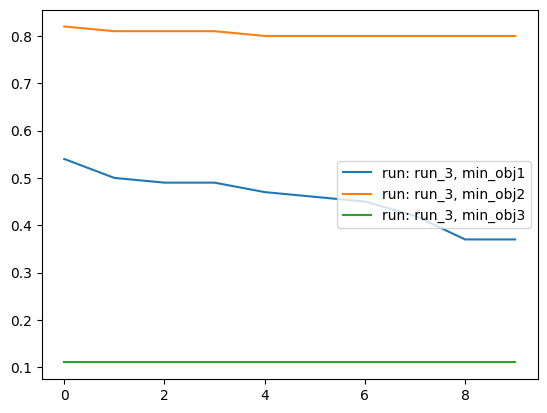

In [5]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        min_obj1_values = []
        min_obj2_values = []
        min_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            min_obj1 = gen_values["min_obj1"]
            min_obj2 = gen_values["min_obj2"]
            min_obj3 = gen_values["min_obj3"]

            min_obj1_values.append(min_obj1)
            min_obj2_values.append(min_obj2)
            min_obj3_values.append(min_obj3)

        plt.plot(gens, min_obj1_values, label=f"run: {run}, min_obj1")
        plt.plot(gens, min_obj2_values, label=f"run: {run}, min_obj2")
        plt.plot(gens, min_obj3_values, label=f"run: {run}, min_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)

{0: {'min_obj1': 0.44, 'min_obj2': 0.47, 'min_obj3': 0.36, 'avg_obj1': 0.5073333333333333, 'avg_obj2': 0.5486666666666667, 'avg_obj3': 0.46066666666666667}, 1: {'min_obj1': 0.4, 'min_obj2': 0.47, 'min_obj3': 0.33, 'avg_obj1': 0.505, 'avg_obj2': 0.5438888888888889, 'avg_obj3': 0.4444444444444444}, 2: {'min_obj1': 0.4, 'min_obj2': 0.47, 'min_obj3': 0.33, 'avg_obj1': 0.5414285714285715, 'avg_obj2': 0.5235714285714286, 'avg_obj3': 0.39571428571428574}, 3: {'min_obj1': 0.34, 'min_obj2': 0.47, 'min_obj3': 0.33, 'avg_obj1': 0.5188888888888888, 'avg_obj2': 0.515, 'avg_obj3': 0.4222222222222222}, 4: {'min_obj1': 0.34, 'min_obj2': 0.47, 'min_obj3': 0.33, 'avg_obj1': 0.47214285714285714, 'avg_obj2': 0.5028571428571429, 'avg_obj3': 0.43142857142857144}, 5: {'min_obj1': 0.33, 'min_obj2': 0.47, 'min_obj3': 0.31, 'avg_obj1': 0.4375, 'avg_obj2': 0.5066666666666667, 'avg_obj3': 0.3933333333333333}, 6: {'min_obj1': 0.33, 'min_obj2': 0.44, 'min_obj3': 0.31, 'avg_obj1': 0.45045454545454544, 'avg_obj2': 0.

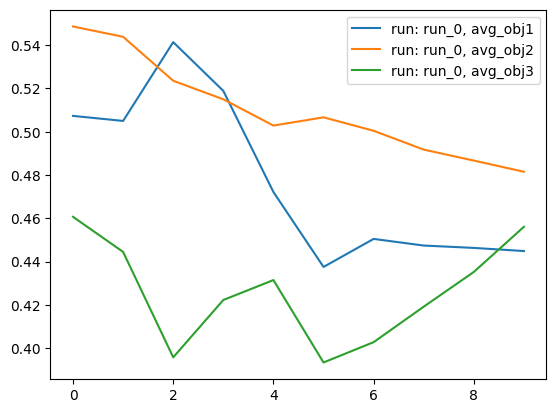

{0: {'min_obj1': 0.45, 'min_obj2': 0.67, 'min_obj3': 0.2, 'avg_obj1': 0.5266666666666667, 'avg_obj2': 0.7016666666666667, 'avg_obj3': 0.26666666666666666}, 1: {'min_obj1': 0.45, 'min_obj2': 0.67, 'min_obj3': 0.2, 'avg_obj1': 0.5155555555555555, 'avg_obj2': 0.701111111111111, 'avg_obj3': 0.25}, 2: {'min_obj1': 0.45, 'min_obj2': 0.67, 'min_obj3': 0.18, 'avg_obj1': 0.4945454545454545, 'avg_obj2': 0.7054545454545454, 'avg_obj3': 0.30363636363636365}, 3: {'min_obj1': 0.42, 'min_obj2': 0.65, 'min_obj3': 0.18, 'avg_obj1': 0.5, 'avg_obj2': 0.6799999999999999, 'avg_obj3': 0.255}, 4: {'min_obj1': 0.37, 'min_obj2': 0.65, 'min_obj3': 0.18, 'avg_obj1': 0.4876923076923077, 'avg_obj2': 0.6823076923076923, 'avg_obj3': 0.26153846153846155}, 5: {'min_obj1': 0.37, 'min_obj2': 0.65, 'min_obj3': 0.18, 'avg_obj1': 0.48142857142857143, 'avg_obj2': 0.6807142857142857, 'avg_obj3': 0.23214285714285715}, 6: {'min_obj1': 0.33, 'min_obj2': 0.65, 'min_obj3': 0.18, 'avg_obj1': 0.47333333333333333, 'avg_obj2': 0.6814

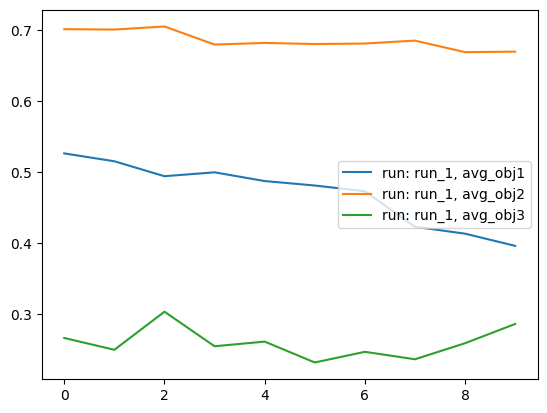

{0: {'min_obj1': 0.5, 'min_obj2': 0.79, 'min_obj3': 0.15, 'avg_obj1': 0.5437500000000001, 'avg_obj2': 0.80875, 'avg_obj3': 0.165}, 1: {'min_obj1': 0.47, 'min_obj2': 0.78, 'min_obj3': 0.14, 'avg_obj1': 0.5416666666666666, 'avg_obj2': 0.7999999999999999, 'avg_obj3': 0.18000000000000002}, 2: {'min_obj1': 0.47, 'min_obj2': 0.78, 'min_obj3': 0.14, 'avg_obj1': 0.5366666666666667, 'avg_obj2': 0.795, 'avg_obj3': 0.18000000000000002}, 3: {'min_obj1': 0.47, 'min_obj2': 0.78, 'min_obj3': 0.14, 'avg_obj1': 0.5233333333333333, 'avg_obj2': 0.7933333333333333, 'avg_obj3': 0.17833333333333334}, 4: {'min_obj1': 0.41, 'min_obj2': 0.77, 'min_obj3': 0.14, 'avg_obj1': 0.5175, 'avg_obj2': 0.7875000000000001, 'avg_obj3': 0.17}, 5: {'min_obj1': 0.41, 'min_obj2': 0.76, 'min_obj3': 0.13, 'avg_obj1': 0.4990909090909091, 'avg_obj2': 0.7890909090909091, 'avg_obj3': 0.17}, 6: {'min_obj1': 0.41, 'min_obj2': 0.76, 'min_obj3': 0.13, 'avg_obj1': 0.5028571428571429, 'avg_obj2': 0.7892857142857144, 'avg_obj3': 0.16642857

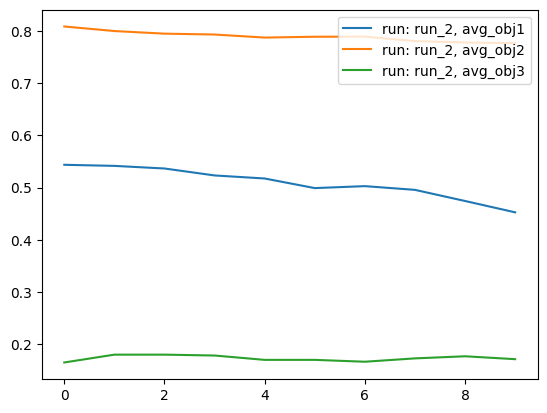

{0: {'min_obj1': 0.54, 'min_obj2': 0.82, 'min_obj3': 0.11, 'avg_obj1': 0.5733333333333334, 'avg_obj2': 0.84, 'avg_obj3': 0.13333333333333333}, 1: {'min_obj1': 0.5, 'min_obj2': 0.81, 'min_obj3': 0.11, 'avg_obj1': 0.5792307692307692, 'avg_obj2': 0.8415384615384615, 'avg_obj3': 0.13615384615384615}, 2: {'min_obj1': 0.49, 'min_obj2': 0.81, 'min_obj3': 0.11, 'avg_obj1': 0.5757142857142857, 'avg_obj2': 0.8271428571428572, 'avg_obj3': 0.13285714285714287}, 3: {'min_obj1': 0.49, 'min_obj2': 0.81, 'min_obj3': 0.11, 'avg_obj1': 0.5528571428571428, 'avg_obj2': 0.8271428571428572, 'avg_obj3': 0.13}, 4: {'min_obj1': 0.47, 'min_obj2': 0.8, 'min_obj3': 0.11, 'avg_obj1': 0.5866666666666667, 'avg_obj2': 0.8166666666666668, 'avg_obj3': 0.15}, 5: {'min_obj1': 0.46, 'min_obj2': 0.8, 'min_obj3': 0.11, 'avg_obj1': 0.5277777777777778, 'avg_obj2': 0.8177777777777777, 'avg_obj3': 0.1311111111111111}, 6: {'min_obj1': 0.45, 'min_obj2': 0.8, 'min_obj3': 0.11, 'avg_obj1': 0.5158333333333334, 'avg_obj2': 0.8175, 'a

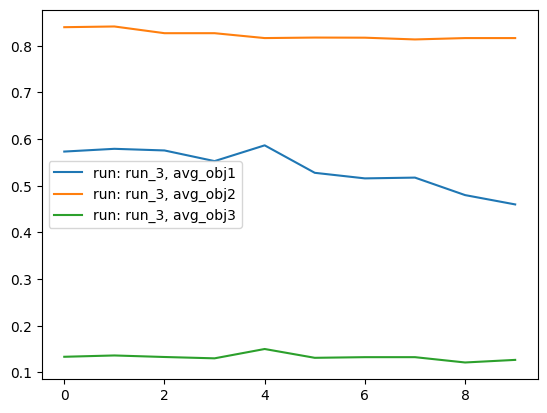

In [6]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        avg_obj1_values = []
        avg_obj2_values = []
        avg_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            avg_obj1 = gen_values["avg_obj1"]
            avg_obj2 = gen_values["avg_obj2"]
            avg_obj3 = gen_values["avg_obj3"]

            avg_obj1_values.append(avg_obj1)
            avg_obj2_values.append(avg_obj2)
            avg_obj3_values.append(avg_obj3)

        plt.plot(gens, avg_obj1_values, label=f"run: {run}, avg_obj1")
        plt.plot(gens, avg_obj2_values, label=f"run: {run}, avg_obj2")
        plt.plot(gens, avg_obj3_values, label=f"run: {run}, avg_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)